`63070501061 S.RAKNA`

# Image Convolution
> Create your own Gaussian Kernel

### Part 1
> 10 points. 2 hrs. 

- Using Python, compute and print the matrix for *Gaussian kernel with σ = 2.5*
- Using *kernel size of 15 x 15* (we use width = ceiling (6*σ) ). 
- Print the kernel as output.

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def g(x, y, center, variance):
    '''
    Returns the value of the Gaussian function at the given point.

    Parameters
    ----------
    x : int
        x-coordinate of the point.
    y : int
        y-coordinate of the point.
    center : int
        Center of the Gaussian function.
    variance : float
        Variance of the Gaussian function.
    '''
    return np.exp(-((np.square(x-center)+np.square(y-center))/(2*variance)))


def gaussian_kernel(sigma, kernel_size):
    """Returns a 2D Gaussian kernel with the given sigma and kernel size."""
    G = np.zeros((kernel_size, kernel_size))
    center = kernel_size//2
    variance = np.square(sigma)
    coefficient = 1/(2*np.pi*variance)
    for x in range(kernel_size):
        for y in range(kernel_size):
            G[x, y] = coefficient*g(x, y, center, variance)
    return G


In [13]:
# Call the function to get a 15*15 Gaussian kernel with sigma=2.5
kernel = gaussian_kernel(2.5, 15)
kernel

array([[1.00246998e-05, 2.83620512e-05, 6.83780610e-05, 1.40478159e-04,
        2.45931251e-04, 3.66886314e-04, 4.66403914e-04, 5.05249329e-04,
        4.66403914e-04, 3.66886314e-04, 2.45931251e-04, 1.40478159e-04,
        6.83780610e-05, 2.83620512e-05, 1.00246998e-05],
       [2.83620512e-05, 8.02423979e-05, 1.93456374e-04, 3.97443199e-04,
        6.95792879e-04, 1.03800100e-03, 1.31955789e-03, 1.42946000e-03,
        1.31955789e-03, 1.03800100e-03, 6.95792879e-04, 3.97443199e-04,
        1.93456374e-04, 8.02423979e-05, 2.83620512e-05],
       [6.83780610e-05, 1.93456374e-04, 4.66403914e-04, 9.58195691e-04,
        1.67748685e-03, 2.50251631e-03, 3.18132173e-03, 3.44628469e-03,
        3.18132173e-03, 2.50251631e-03, 1.67748685e-03, 9.58195691e-04,
        4.66403914e-04, 1.93456374e-04, 6.83780610e-05],
       [1.40478159e-04, 3.97443199e-04, 9.58195691e-04, 1.96854905e-03,
        3.44628469e-03, 5.14125261e-03, 6.53581302e-03, 7.08016172e-03,
        6.53581302e-03, 5.14125261e-0

In [14]:
# Export the kernel to a csv file
np.savetxt('kernel.csv', kernel, delimiter=',')

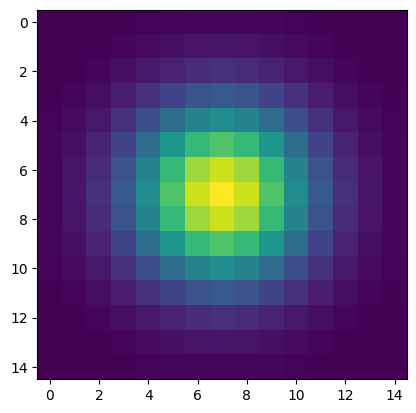

In [15]:
plt.imshow(kernel)

### Part 2

> 10 points. 0.5 hrs. 

- Modify the *OpenCV* code shown in class to show the result of the convolution
of your **15 x 15 Gaussian kernel** using the Lenna image.

In [16]:
lenna = cv2.imread('./Lenna.png', cv2.IMREAD_COLOR)
if lenna is None:
    print('Failed to load image')
    exit()

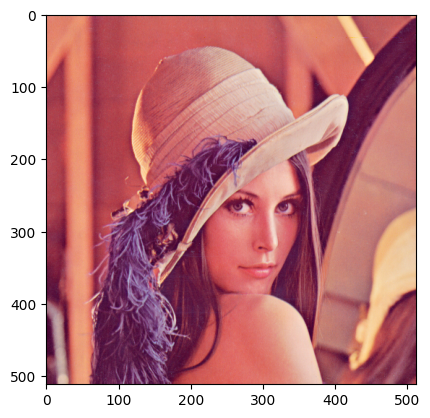

In [17]:
# show image with original color
plt.imshow(cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB))

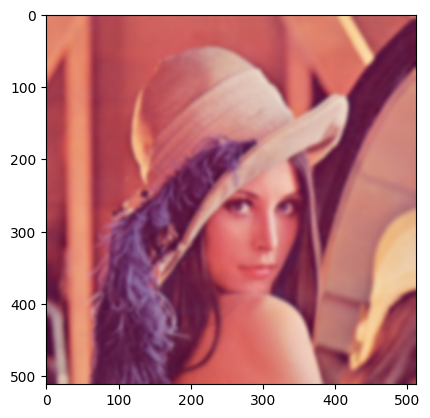

In [18]:
# convolution with kernel
lenna_conv = cv2.filter2D(lenna, -1, kernel)
plt.imshow(cv2.cvtColor(lenna_conv, cv2.COLOR_BGR2RGB))